In [1081]:
# Workspace to work on getting the data forn all locations 
import pandas as pd
import datetime
from datetime import datetime, time
import numpy as np

# Load the CSV file into a DataFrame
berlin_df = pd.read_csv('../Data_API/dep&ret_flights/dep&ret_flights_0320/berlin_0320.csv')
# berlin_df = pd.read_csv('../Data_API/dep_flights/depFlight_0320/berlin_0320.csv')
berlin_df['week'] = pd.to_datetime(berlin_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
berlin_df['airline'] = np.where(berlin_df['depFlight_name'] == berlin_df['retFlight_name'], berlin_df['depFlight_name'],'Mixed' )

# 2023-06-02T14:20:00

# Printing the first 5 rows of the DataFrame
display(berlin_df.head())




,id,depFlight_id,depFlight_origin.name,depFlight_origin.displayCode,depFlight_destination.name,depFlight_destination.displayCode,depFlight_durationInMinutes,depFlight_departure,depFlight_arrival,depFlight_name,...,rating_status,rating,rating_breakdown.reliable_prices,rating_breakdown.clear_extra_fees,rating_breakdown.customer_service,rating_breakdown.ease_of_booking,rating_breakdown.other,price_amount,week,airline
0,13771-2306021420--32356-0-9828-2306021710|9828...,13771-2306021420--32356-0-9828-2306021710,London Luton,LTN,Berlin Brandenburg,BER,110,2023-06-02T14:20:00,2023-06-02T17:10:00,easyJet,...,available,3.56,3.884484,4.220968,4.864768,4.079936,2.206272,317.99,22,Mixed
1,13542-2306020640--32356-0-9828-2306020940|9828...,13542-2306020640--32356-0-9828-2306020940,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-06-02T06:40:00,2023-06-02T09:40:00,easyJet,...,available,2.60,2.174432,4.065268,5.000000,2.366720,1.787184,447.59,22,Mixed
2,13554-2306020650--32480-0-9828-2306020940|9828...,13554-2306020650--32480-0-9828-2306020940,London Heathrow,LHR,Berlin Brandenburg,BER,110,2023-06-02T06:50:00,2023-06-02T09:40:00,British Airways,...,available,4.13,4.084108,4.606664,4.994560,4.503012,3.316636,282.60,22,British Airways
3,13554-2306021030--32480-0-9828-2306021325|9828...,13554-2306021030--32480-0-9828-2306021325,London Heathrow,LHR,Berlin Brandenburg,BER,115,2023-06-02T10:30:00,2023-06-02T13:25:00,British Airways,...,available,4.25,4.622984,4.600808,4.994156,4.469772,3.321472,394.28,22,British Airways
4,13554-2306020650--32480-0-9828-2306020940|9828...,13554-2306020650--32480-0-9828-2306020940,London Heathrow,LHR,Berlin Brandenburg,BER,110,2023-06-02T06:50:00,2023-06-02T09:40:00,British Airways,...,available,4.13,4.084108,4.606664,4.994560,4.503012,3.316636,291.88,22,Mixed


In [1082]:
# selected_cols_q1 = berlin_df[['depFlight_id', 'depFlight_name', 'week']]
# # display(selected_cols)
# print(selected_cols_q1.shape) 


# bl_flight_name_week = selected_cols_q1.groupby(['depFlight_name', 'week']).size().unstack('depFlight_name').reset_index()
# display(bl_flight_name_week)

selected_cols = berlin_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]
print(selected_cols.shape)

bl_flight_name_week = selected_cols.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(bl_flight_name_week)


(3436, 4)


airline,week,British Airways,Mixed,Ryanair,easyJet
0,22,55,136,9,16
1,23,59,119,9,16
2,24,40,96,9,16
3,25,40,112,9,16
4,26,40,111,9,16
5,27,54,123,9,16
6,28,54,119,9,16
7,29,45,119,9,16
8,30,45,119,9,16
9,31,45,116,9,16


,airline,week,price_amount
0,British Airways,22,338
1,British Airways,23,316
2,British Airways,24,322
3,British Airways,25,259
4,British Airways,26,306
...,...,...,...
67,easyJet,35,166
68,easyJet,36,154
69,easyJet,37,145
70,easyJet,38,273


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/2572955055.py:10: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iset

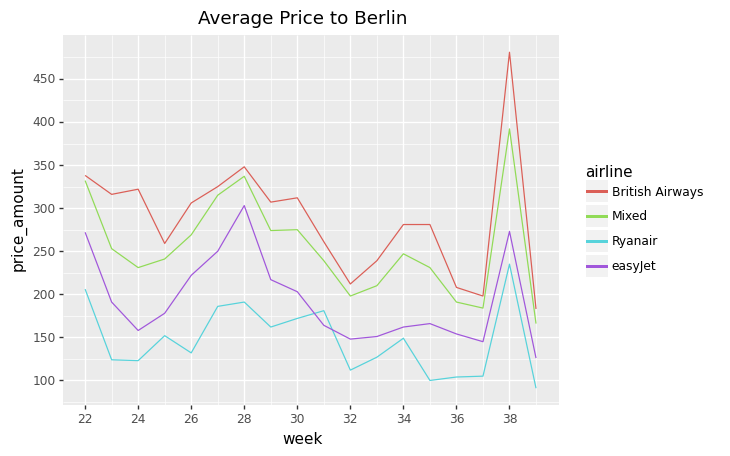

<ggplot: (8788562209735)>

In [1083]:
selected_cols_price = berlin_df[['id', 'airline', 'week', 'price_amount']]


bl_flight_name_week_two_mean = selected_cols_price.groupby(['airline', 'week']).mean('price_amount').astype(int).reset_index()
display(bl_flight_name_week_two_mean)

from plotnine import ggplot, aes, geom_line, scale_x_continuous, scale_y_continuous,labs

# Reshape the data from wide to long format
df_long = bl_flight_name_week_two_mean.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(bl_flight_name_week_two_mean['week'].min(), bl_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, bl_flight_name_week_two_mean['price_amount'].max()+1, 50))
  + labs(title="Average Price to Berlin")
)



,airline,week,price_amount
0,British Airways,22,345
1,British Airways,23,286
2,British Airways,24,302
3,British Airways,25,259
4,British Airways,26,289
...,...,...,...
67,easyJet,35,163
68,easyJet,36,154
69,easyJet,37,142
70,easyJet,38,251


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/3560632501.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

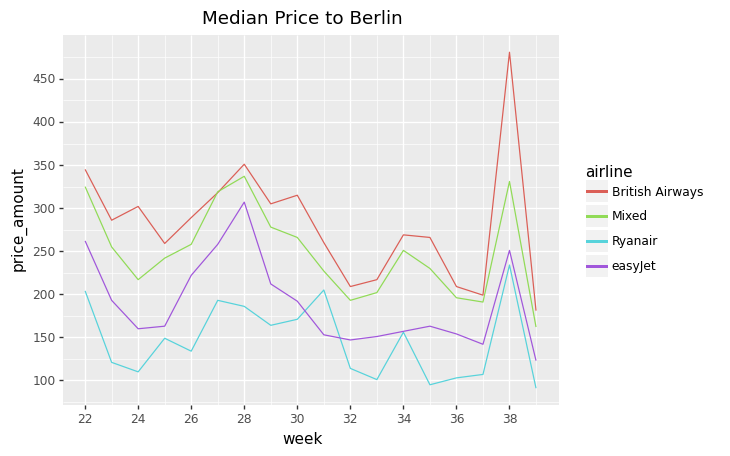

<ggplot: (8788564543865)>

In [1084]:
# MEDIAN BERLIN
bl_flight_name_week_two_median = selected_cols_price.groupby(['airline', 'week']).median('price_amount').astype(int).reset_index()
display(bl_flight_name_week_two_median)


df_long = bl_flight_name_week_two_median.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(bl_flight_name_week_two_median['week'].min(), bl_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, bl_flight_name_week_two_median['price_amount'].max()+1, 50))
  + labs(title="Median Price to Berlin")
)


,airline,week,price_amount
0,British Airways,22,268
1,British Airways,23,171
2,British Airways,24,200
3,British Airways,25,206
4,British Airways,26,167
...,...,...,...
67,easyJet,35,137
68,easyJet,36,98
69,easyJet,37,116
70,easyJet,38,230


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/576817682.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetit

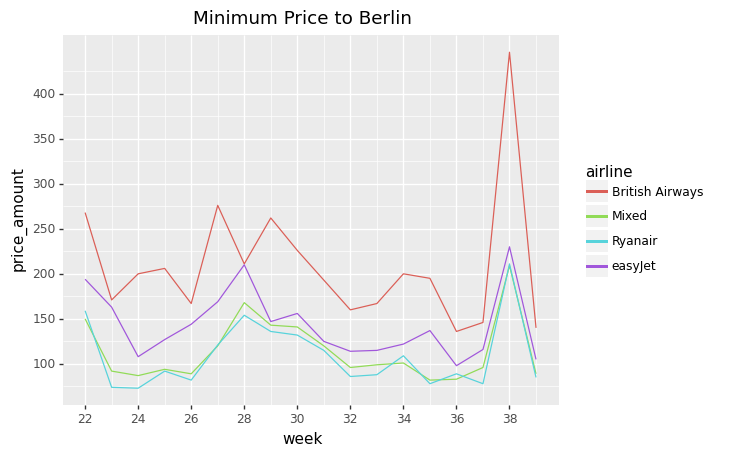

<ggplot: (8788560378007)>

In [1085]:
# MINIMUM BERLIN
bl_flight_name_week_two_min = selected_cols_price.groupby(['airline', 'week']).min('price_amount').astype(int).reset_index()
display(bl_flight_name_week_two_min)


df_long = bl_flight_name_week_two_min.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(bl_flight_name_week_two_min['week'].min(), bl_flight_name_week_two_min['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, bl_flight_name_week_two_min['price_amount'].max()+1, 50))
  + labs(title="Minimum Price to Berlin")
)

In [1086]:
# Madrid Average Price

madrid_df = pd.read_csv('../Data_API/dep&ret_flights/dep&ret_flights_0320/madrid_0320.csv')
madrid_df['week'] = pd.to_datetime(madrid_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
madrid_df['airline'] = np.where(madrid_df['depFlight_name'] == madrid_df['retFlight_name'], madrid_df['depFlight_name'],'Mixed' )

# display(madrid_df.head())


In [1087]:
# Madrid
# selected_cols_madrid = madrid_df[['depFlight_id', 'depFlight_name', 'week']].drop_duplicates()
# print(selected_cols_madrid.shape) 

# madrid_flight_name_week = selected_cols_madrid.groupby(['depFlight_name', 'week']).size().unstack('depFlight_name').reset_index()
# display(madrid_flight_name_week)

selected_cols_madrid = madrid_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]
print(selected_cols_madrid.shape)

madrid_flight_name_week = selected_cols_madrid.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(madrid_flight_name_week)

(20485, 4)


airline,week,Air Europa,British Airways,Iberia,Iberia Express,Mixed,Ryanair,Vueling Airlines,easyJet
0,22,4,183,237,4,624,9,100,4
1,23,4,169,238,4,697,9,100,4
2,24,4,169,224,4,773,9,100,4
3,25,4,135,182,4,680,9,92,4
4,26,4,147,188,4,671,9,110,6
5,27,4,130,169,4,680,9,108,9
6,28,4,127,169,4,718,9,103,9
7,29,4,117,156,4,688,9,109,9
8,30,4,119,156,4,776,9,110,9
9,31,4,80,99,4,582,9,56,9


,airline,week,price_amount
0,Air Europa,22,278
1,Air Europa,23,193
2,Air Europa,24,175
3,Air Europa,25,232
4,Air Europa,26,342
...,...,...,...
139,easyJet,35,150
140,easyJet,36,124
141,easyJet,37,119
142,easyJet,38,123


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/1298516827.py:23: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iset

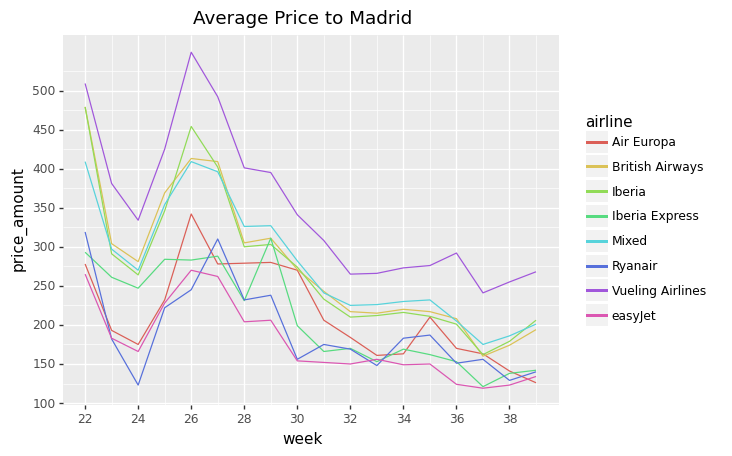

<ggplot: (8788559024132)>

In [1088]:
# AVERAGE PRICE TO MADRID

# selected_cols_price_madrid = madrid_df[['depFlight_id', 'depFlight_name', 'week', 'price_amount']]

# madrid_flight_name_week_two_mean = selected_cols_price_madrid.groupby(['depFlight_name', 'week']).mean('price_amount').astype(int).reset_index()
# display(madrid_flight_name_week_two_mean)


# df_long = madrid_flight_name_week_two_mean.melt(id_vars=['depFlight_name', 'week'], var_name='airline', value_name='price_amount')
# (ggplot(df_long, aes(x='week', y='price_amount', color='depFlight_name'))
#  + geom_line()
#  + scale_x_continuous(breaks=range(madrid_flight_name_week_two_mean['week'].min(), madrid_flight_name_week_two_mean['week'].max()+1, 2))
#  + scale_y_continuous(breaks=range(0, madrid_flight_name_week_two_mean['price_amount'].max()+1, 50))
# + labs(title="Average Price to Madrid")
# )

selected_cols_price = madrid_df[['id', 'airline', 'week', 'price_amount']]

madrid_flight_name_week_two_mean = selected_cols_price.groupby(['airline', 'week']).mean('price_amount').astype(int).reset_index()
display(madrid_flight_name_week_two_mean)

# Reshape the data from wide to long format
df_long = madrid_flight_name_week_two_mean.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(madrid_flight_name_week_two_mean['week'].min(), madrid_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, madrid_flight_name_week_two_mean['price_amount'].max()+1, 50))
  + labs(title="Average Price to Madrid")
)

,airline,week,price_amount
0,Air Europa,22,278
1,Air Europa,23,194
2,Air Europa,24,174
3,Air Europa,25,232
4,Air Europa,26,342
...,...,...,...
139,easyJet,35,144
140,easyJet,36,129
141,easyJet,37,130
142,easyJet,38,127


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/3150812033.py:22: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iset

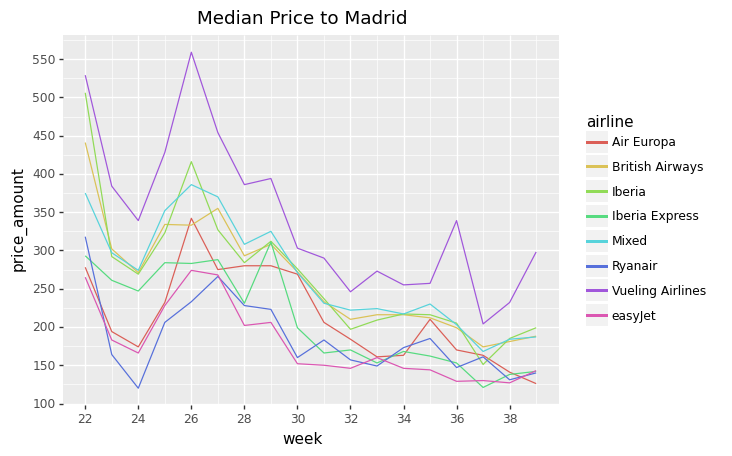

<ggplot: (8788559779133)>

In [1089]:
# MEDIAN PRICE TO MADRID

# madrid_flight_name_week_two_median = selected_cols_price_madrid.groupby(['depFlight_name', 'week']).median('price_amount').astype(int).reset_index()
# display(madrid_flight_name_week_two_median)

# df_long = madrid_flight_name_week_two_median.melt(id_vars=['depFlight_name', 'week'], var_name='airline', value_name='price_amount')


# (ggplot(df_long, aes(x='week', y='price_amount', color='depFlight_name'))
#  + geom_line()
#  + scale_x_continuous(breaks=range(madrid_flight_name_week_two_median['week'].min(), madrid_flight_name_week_two_median['week'].max()+1, 2))
#  + scale_y_continuous(breaks=range(0, madrid_flight_name_week_two_median['price_amount'].max()+1, 50))
# + labs(title="Median Price to Madrid")
# )



madrid_flight_name_week_two_median = selected_cols_price.groupby(['airline', 'week']).median('price_amount').astype(int).reset_index()
display(madrid_flight_name_week_two_median)

# Reshape the data from wide to long format
df_long = madrid_flight_name_week_two_median.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(madrid_flight_name_week_two_median['week'].min(), madrid_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, madrid_flight_name_week_two_median['price_amount'].max()+1, 50))
  + labs(title="Median Price to Madrid")
)


,airline,week,price_amount
0,Air Europa,22,231
1,Air Europa,23,170
2,Air Europa,24,160
3,Air Europa,25,206
4,Air Europa,26,310
...,...,...,...
139,easyJet,35,117
140,easyJet,36,79
141,easyJet,37,79
142,easyJet,38,84


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/1429499868.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

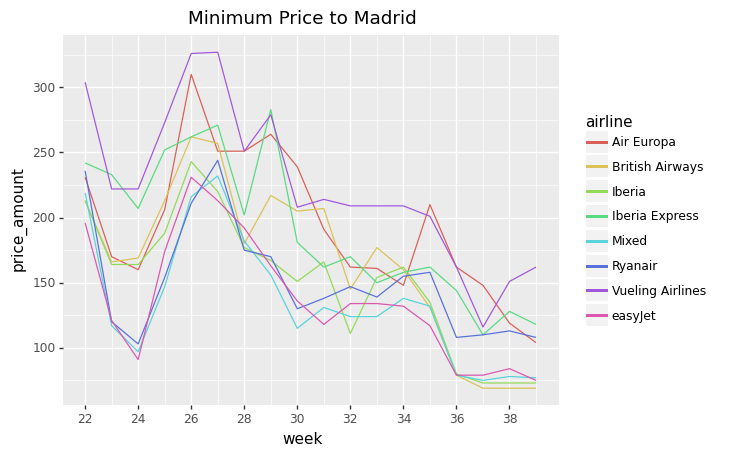

<ggplot: (8788562306898)>

In [1090]:
# MINIMUM PRICE FOR MADRID
madrid_flight_name_week_two_min = selected_cols_price.groupby(['airline', 'week']).min('price_amount').astype(int).reset_index()
display(madrid_flight_name_week_two_min)

# Reshape the data from wide to long format
df_long = madrid_flight_name_week_two_min.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(madrid_flight_name_week_two_min['week'].min(), madrid_flight_name_week_two_min['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, madrid_flight_name_week_two_min['price_amount'].max()+1, 50))
  + labs(title="Minimum Price to Madrid")
)


In [1091]:
# ATHENS

athens_df = pd.read_csv('../Data_API/dep&ret_flights/dep&ret_flights_0320/athens_0320.csv')
athens_df['week'] = pd.to_datetime(athens_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
athens_df['airline'] = np.where(athens_df['depFlight_name'] == athens_df['retFlight_name'], athens_df['depFlight_name'],'Mixed' )

# display(athens_df.head())

In [1092]:
# ATHENS 

selected_cols_athens = athens_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]
print(selected_cols_athens.shape)

athens_flight_name_week = selected_cols_athens.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(athens_flight_name_week)

(4257, 4)


airline,week,Aegean Airlines,British Airways,Mixed,Ryanair,SKY express,Wizz Air UK,easyJet
0,22,9,24,173,4,1,6,6
1,23,9,27,173,4,1,6,6
2,24,9,25,182,4,1,6,6
3,25,9,28,170,4,1,6,6
4,26,9,30,196,4,1,6,9
5,27,9,24,194,4,2,6,9
6,28,9,25,200,4,1,6,9
7,29,9,25,204,4,1,6,9
8,30,9,26,190,4,1,6,9
9,31,9,24,179,4,1,6,9


,airline,week,price_amount
0,Aegean Airlines,22,637
1,Aegean Airlines,23,454
2,Aegean Airlines,24,399
3,Aegean Airlines,25,439
4,Aegean Airlines,26,637
...,...,...,...
121,easyJet,35,434
122,easyJet,36,343
123,easyJet,37,303
124,easyJet,38,314


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/1225830413.py:22: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iset

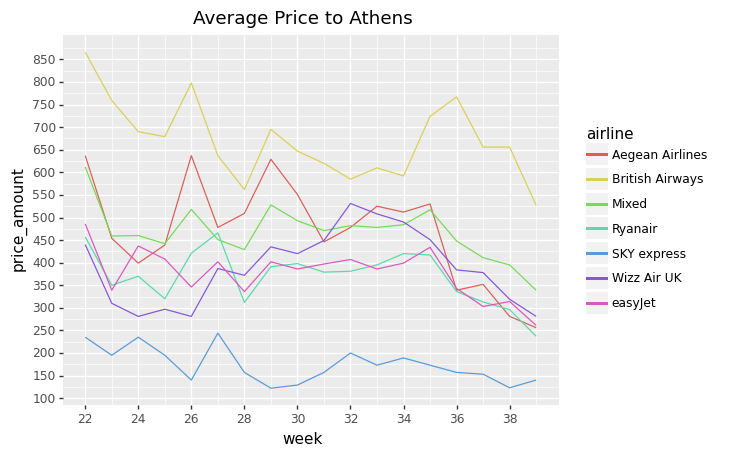

<ggplot: (8788559656274)>

In [1093]:
# AVERAGE PRICE TO ATHENS
# selected_cols_price_athens = athens_df[['depFlight_id', 'depFlight_name', 'week', 'price_amount']]

# athens_flight_name_week_two_mean = selected_cols_price_athens.groupby(['depFlight_name', 'week']).mean('price_amount').astype(int).reset_index()
# display(athens_flight_name_week_two_mean)


# df_long = athens_flight_name_week_two_mean.melt(id_vars=['depFlight_name', 'week'], var_name='airline', value_name='price_amount')
# (ggplot(df_long, aes(x='week', y='price_amount', color='depFlight_name'))
#  + geom_line()
#  + scale_x_continuous(breaks=range(athens_flight_name_week_two_mean['week'].min(), athens_flight_name_week_two_mean['week'].max()+1, 2))
#  + scale_y_continuous(breaks=range(0, athens_flight_name_week_two_mean['price_amount'].max()+1, 50))
# + labs(title="Average Price to Athens")
# )

selected_cols_price = athens_df[['id', 'airline', 'week', 'price_amount']]

athens_flight_name_week_two_mean = selected_cols_price.groupby(['airline', 'week']).mean('price_amount').astype(int).reset_index()
display(athens_flight_name_week_two_mean)

# Reshape the data from wide to long format
df_long = athens_flight_name_week_two_mean.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(athens_flight_name_week_two_mean['week'].min(), athens_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, athens_flight_name_week_two_mean['price_amount'].max()+1, 50))
  + labs(title="Average Price to Athens")
)

,airline,week,price_amount
0,Aegean Airlines,22,625
1,Aegean Airlines,23,440
2,Aegean Airlines,24,388
3,Aegean Airlines,25,446
4,Aegean Airlines,26,649
...,...,...,...
121,easyJet,35,438
122,easyJet,36,343
123,easyJet,37,307
124,easyJet,38,314


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/1388617095.py:19: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iset

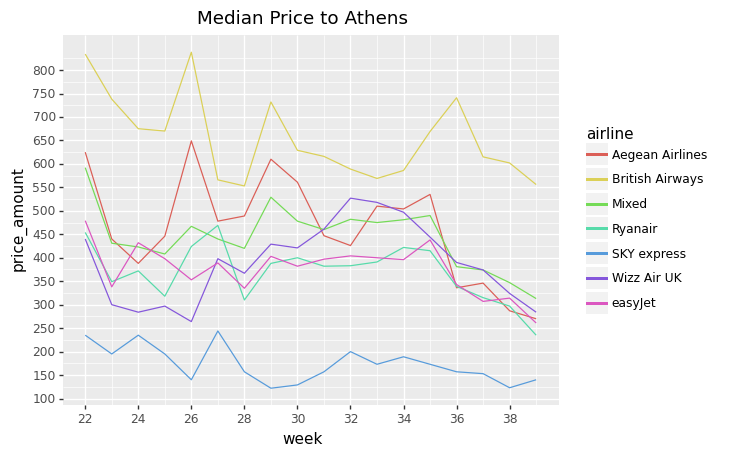

<ggplot: (8788564737109)>

In [1094]:
# MEDIAN PRICE TO ATHENS
# selected_cols_price_athens = athens_df[['depFlight_id', 'depFlight_name', 'week', 'price_amount']]

# athens_flight_name_week_two_median = selected_cols_price_athens.groupby(['depFlight_name', 'week']).median('price_amount').astype(int).reset_index()
# display(athens_flight_name_week_two_median)

# df_long = athens_flight_name_week_two_mean.melt(id_vars=['depFlight_name', 'week'], var_name='airline', value_name='price_amount')
# (ggplot(df_long, aes(x='week', y='price_amount', color='depFlight_name'))
#  + geom_line()
#  + scale_x_continuous(breaks=range(athens_flight_name_week_two_median['week'].min(), athens_flight_name_week_two_median['week'].max()+1, 2))
#  + scale_y_continuous(breaks=range(0, athens_flight_name_week_two_median['price_amount'].max()+1, 50))
# + labs(title="Median Price to Athens")
# )

athens_flight_name_week_two_median = selected_cols_price.groupby(['airline', 'week']).median('price_amount').astype(int).reset_index()
display(athens_flight_name_week_two_median)

# Reshape the data from wide to long format
df_long = athens_flight_name_week_two_median.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(athens_flight_name_week_two_median['week'].min(), athens_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, athens_flight_name_week_two_median['price_amount'].max()+1, 50))
  + labs(title="Median Price to Athens")
)

,airline,week,price_amount
0,Aegean Airlines,22,597
1,Aegean Airlines,23,383
2,Aegean Airlines,24,299
3,Aegean Airlines,25,347
4,Aegean Airlines,26,465
...,...,...,...
121,easyJet,35,419
122,easyJet,36,330
123,easyJet,37,272
124,easyJet,38,287


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/3566564271.py:7: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

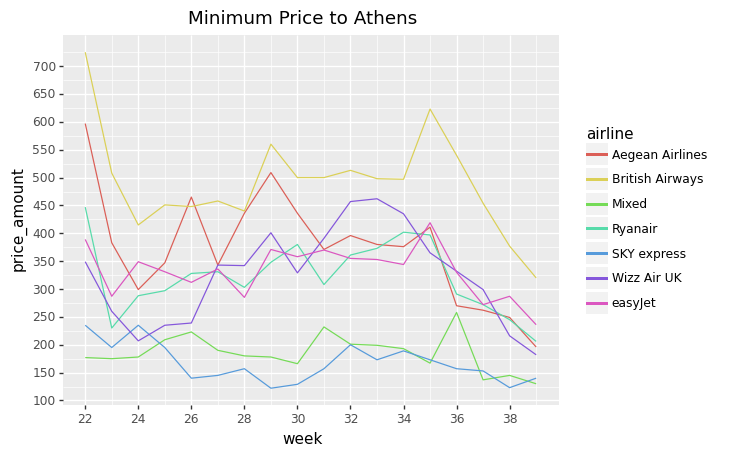

<ggplot: (8788563794526)>

In [1095]:
# MINIMUM PRICE TO ATHENS

athens_flight_name_week_two_min = selected_cols_price.groupby(['airline', 'week']).min('price_amount').astype(int).reset_index()
display(athens_flight_name_week_two_min)

# Reshape the data from wide to long format
df_long = athens_flight_name_week_two_min.melt(id_vars=['airline', 'week'], var_name='Carrier', value_name='price_amount')

# Creating the plot using ggplot and aes
(ggplot(df_long, aes(x='week', y='price_amount', color='airline'))
 + geom_line()
 + scale_x_continuous(breaks=range(athens_flight_name_week_two_min['week'].min(), athens_flight_name_week_two_min['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, athens_flight_name_week_two_min['price_amount'].max()+1, 50))
  + labs(title="Minimum Price to Athens")
)

In [1096]:
# BUDAPEST

budapest_df = pd.read_csv('../Data_API/dep&ret_flights/dep&ret_flights_0320/budapest_0320.csv')
budapest_df['week'] = pd.to_datetime(budapest_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
budapest_df['airline'] = np.where(budapest_df['depFlight_name'] == budapest_df['retFlight_name'], budapest_df['depFlight_name'],'Mixed' )
display(budapest_df.head())



,id,depFlight_id,depFlight_origin.name,depFlight_origin.displayCode,depFlight_destination.name,depFlight_destination.displayCode,depFlight_durationInMinutes,depFlight_departure,depFlight_arrival,depFlight_name,...,rating_status,rating,rating_breakdown.reliable_prices,rating_breakdown.clear_extra_fees,rating_breakdown.customer_service,rating_breakdown.ease_of_booking,rating_breakdown.other,price_amount,week,airline
0,13554-2306022130--32480-0-10202-2306030100|102...,13554-2306022130--32480-0-10202-2306030100,London Heathrow,LHR,Budapest,BUD,150,2023-06-02T21:30:00,2023-06-03T01:00:00,British Airways,...,available,3.48,3.670664,4.299488,4.969300,3.597548,2.365480,327.98,22,Mixed
1,13542-2306020735--32356-0-10202-2306021110|102...,13542-2306020735--32356-0-10202-2306021110,London Gatwick,LGW,Budapest,BUD,155,2023-06-02T07:35:00,2023-06-02T11:10:00,easyJet,...,available,2.60,2.174432,4.065268,5.000000,2.366720,1.787184,351.59,22,Mixed
2,13554-2306021040--32480-0-10202-2306021420|102...,13554-2306021040--32480-0-10202-2306021420,London Heathrow,LHR,Budapest,BUD,160,2023-06-02T10:40:00,2023-06-02T14:20:00,British Airways,...,available,3.14,3.530284,3.977936,4.684716,3.824488,1.531332,374.99,22,Mixed
3,13542-2306021255--31669-0-10202-2306021620|102...,13542-2306021255--31669-0-10202-2306021620,London Gatwick,LGW,Budapest,BUD,145,2023-06-02T12:55:00,2023-06-02T16:20:00,Wizz Air,...,available,4.13,4.084108,4.606664,4.994560,4.503012,3.316636,332.70,22,Wizz Air
4,16574-2306021330--31915-0-10202-2306021655|102...,16574-2306021330--31915-0-10202-2306021655,London Stansted,STN,Budapest,BUD,145,2023-06-02T13:30:00,2023-06-02T16:55:00,Ryanair,...,available,3.48,3.670664,4.299488,4.969300,3.597548,2.365480,483.99,22,Mixed


In [1097]:
# selected_cols_budapest = budapest_df[['depFlight_id', 'depFlight_name', 'week']].drop_duplicates()
# print(selected_cols_budapest.shape) 

# budapest_flight_name_week = selected_cols_budapest.groupby(['depFlight_name', 'week']).size().unstack('depFlight_name').reset_index()
# display(budapest_flight_name_week)

selected_cols_budapest = budapest_df[['depFlight_id', 'retFlight_id', 'airline', 'week']]
print(selected_cols_budapest.shape)

budapest_flight_name_week = selected_cols_budapest.groupby(['airline', 'week']).size().unstack('airline').reset_index()
display(budapest_flight_name_week)

(3094, 4)


airline,week,British Airways,Mixed,Ryanair,Wizz Air,easyJet
0,22,16,95,16,16,1
1,23,9,94,16,16,1
2,24,12,101,16,16,1
3,25,12,108,16,16,1
4,26,16,134,16,16,4
5,27,16,132,16,16,4
6,28,16,134,16,16,4
7,29,16,119,16,16,4
8,30,12,133,16,16,4
9,31,12,126,16,16,4


,depFlight_name,week,price_amount
0,British Airways,22,394
1,British Airways,23,421
2,British Airways,24,486
3,British Airways,25,370
4,British Airways,26,405
...,...,...,...
67,easyJet,35,310
68,easyJet,36,288
69,easyJet,37,308
70,easyJet,38,242


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/3530136541.py:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

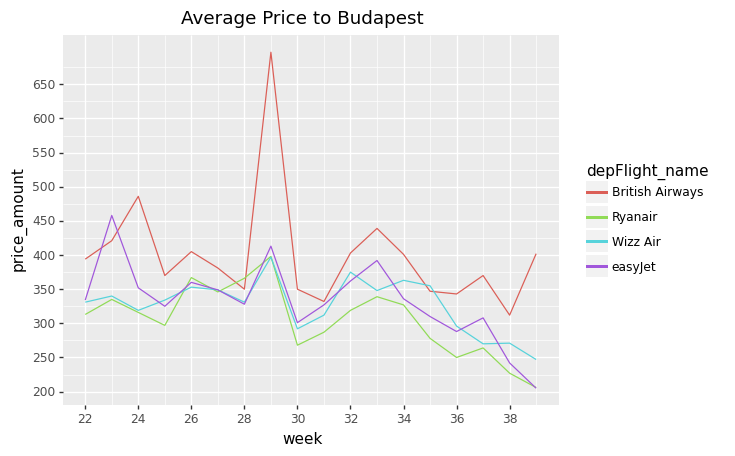

<ggplot: (8788563428115)>

In [1098]:
# AVERAGE PRICE TO BUDAPEST
selected_cols_price_budapest = budapest_df[['depFlight_id', 'depFlight_name', 'week', 'price_amount']]

budapest_flight_name_week_two_mean = selected_cols_price_budapest.groupby(['depFlight_name', 'week']).mean('price_amount').astype(int).reset_index()
display(budapest_flight_name_week_two_mean)


df_long = budapest_flight_name_week_two_mean.melt(id_vars=['depFlight_name', 'week'], var_name='airline', value_name='price_amount')
(ggplot(df_long, aes(x='week', y='price_amount', color='depFlight_name'))
 + geom_line()
 + scale_x_continuous(breaks=range(budapest_flight_name_week_two_mean['week'].min(), budapest_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, budapest_flight_name_week_two_mean['price_amount'].max()+1, 50))
+ labs(title="Average Price to Budapest")
)

,depFlight_name,week,price_amount
0,British Airways,22,400
1,British Airways,23,452
2,British Airways,24,491
3,British Airways,25,370
4,British Airways,26,416
...,...,...,...
67,easyJet,35,316
68,easyJet,36,284
69,easyJet,37,315
70,easyJet,38,242


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/3491260089.py:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

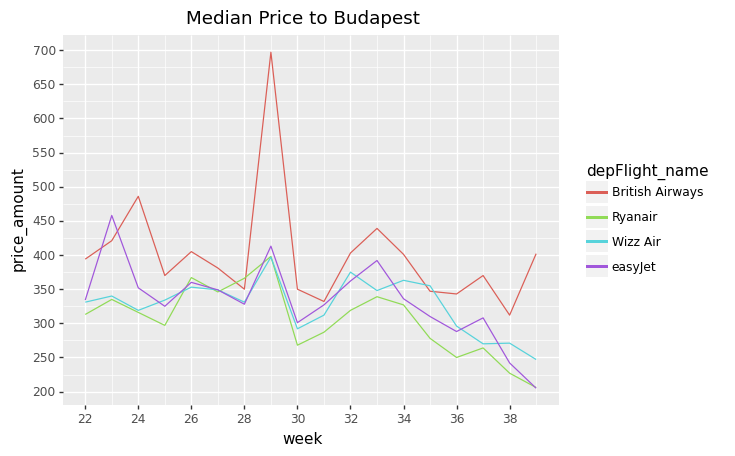

<ggplot: (8788562603626)>

In [1099]:
# MEDIAN PRICE TO BUDAPEST
selected_cols_price_budapest = budapest_df[['depFlight_id', 'depFlight_name', 'week', 'price_amount']]

budapest_flight_name_week_two_median = selected_cols_price_budapest.groupby(['depFlight_name', 'week']).median('price_amount').astype(int).reset_index()
display(budapest_flight_name_week_two_median)


df_long = budapest_flight_name_week_two_mean.melt(id_vars=['depFlight_name', 'week'], var_name='airline', value_name='price_amount')
(ggplot(df_long, aes(x='week', y='price_amount', color='depFlight_name'))
 + geom_line()
 + scale_x_continuous(breaks=range(budapest_flight_name_week_two_median['week'].min(), budapest_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, budapest_flight_name_week_two_median['price_amount'].max()+1, 50))
+ labs(title="Median Price to Budapest")
)

In [1100]:
# LISBON
lisbon_df = pd.read_csv('../Data_API/dep&ret_flights/dep&ret_flights_0320/lisbon_0320.csv')
lisbon_df['week'] = pd.to_datetime(lisbon_df['depFlight_departure'], format = '%Y-%m-%dT%H:%M:%S').dt.isocalendar().week 
display(lisbon_df.head())

# Madrid
selected_cols_lisbon = lisbon_df[['depFlight_id', 'depFlight_name', 'week']].drop_duplicates()
print(selected_cols_lisbon.shape) 

lisbon_flight_name_week = selected_cols_lisbon.groupby(['depFlight_name', 'week']).size().unstack('depFlight_name').reset_index()
display(lisbon_flight_name_week)

,id,depFlight_id,depFlight_origin.name,depFlight_origin.displayCode,depFlight_destination.name,depFlight_destination.displayCode,depFlight_durationInMinutes,depFlight_departure,depFlight_arrival,depFlight_name,...,is_carrier,rating_status,rating,rating_breakdown.reliable_prices,rating_breakdown.clear_extra_fees,rating_breakdown.customer_service,rating_breakdown.ease_of_booking,rating_breakdown.other,price_amount,week
0,16574-2306020725--31915-0-13577-2306021015|135...,16574-2306020725--31915-0-13577-2306021015,London Stansted,STN,Lisbon,LIS,170,2023-06-02T07:25:00,2023-06-02T10:15:00,Ryanair,...,False,available,3.56,3.884484,4.220968,4.864768,4.079936,2.206272,367.99,22
1,13771-2306021225--32356-0-13577-2306021515|135...,13771-2306021225--32356-0-13577-2306021515,London Luton,LTN,Lisbon,LIS,170,2023-06-02T12:25:00,2023-06-02T15:15:00,easyJet,...,False,available,2.60,2.174432,4.065268,5.000000,2.366720,1.787184,594.09,22
2,13554-2306021245--32480-0-13577-2306021535|135...,13554-2306021245--32480-0-13577-2306021535,London Heathrow,LHR,Lisbon,LIS,170,2023-06-02T12:45:00,2023-06-02T15:35:00,British Airways,...,False,available,2.60,2.174432,4.065268,5.000000,2.366720,1.787184,641.36,22
3,13554-2306021845--31781-0-13577-2306022125|135...,13554-2306021845--31781-0-13577-2306022125,London Heathrow,LHR,Lisbon,LIS,160,2023-06-02T18:45:00,2023-06-02T21:25:00,TAP Air Portugal,...,False,available,3.48,3.670664,4.299488,4.969300,3.597548,2.365480,420.98,22
4,13542-2306022000--32356-0-13577-2306022250|135...,13542-2306022000--32356-0-13577-2306022250,London Gatwick,LGW,Lisbon,LIS,170,2023-06-02T20:00:00,2023-06-02T22:50:00,easyJet,...,False,available,4.13,4.084108,4.606664,4.994560,4.503012,3.316636,323.89,22


(391, 3)


depFlight_name,week,British Airways,Ryanair,TAP Air Portugal,Wizz Air UK,easyJet
0,22,4,4,7,1,6
1,23,4,4,7,1,6
2,24,3,4,7,1,6
3,25,3,4,7,1,6
4,26,3,4,7,1,6
5,27,4,4,7,1,6
6,28,4,4,7,1,6
7,29,4,4,6,1,6
8,30,4,4,7,1,6
9,31,4,4,7,1,6


,depFlight_name,week,price_amount
0,British Airways,22,491
1,British Airways,23,415
2,British Airways,24,408
3,British Airways,25,433
4,British Airways,26,452
...,...,...,...
85,easyJet,35,329
86,easyJet,36,244
87,easyJet,37,245
88,easyJet,38,218


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/2114031313.py:8: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

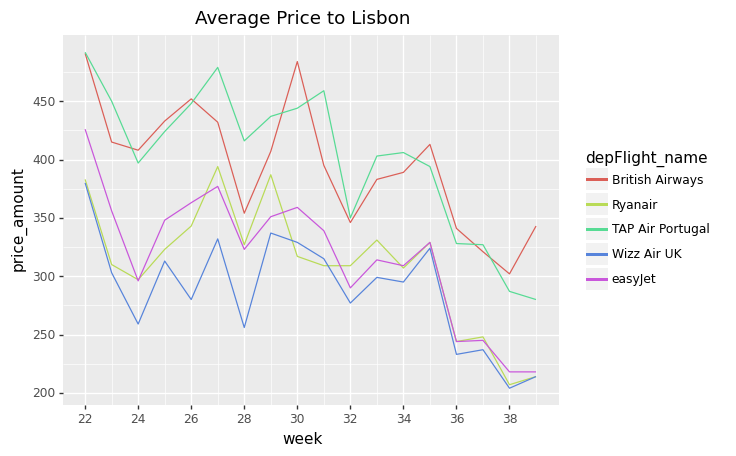

<ggplot: (8788564724703)>

In [1101]:
# AVERAGE PRICE TO LISBON
selected_cols_price_lisbon = lisbon_df[['depFlight_id', 'depFlight_name', 'week', 'price_amount']]

lisbon_flight_name_week_two_mean = selected_cols_price_lisbon.groupby(['depFlight_name', 'week']).mean('price_amount').astype(int).reset_index()
display(lisbon_flight_name_week_two_mean)


df_long = lisbon_flight_name_week_two_mean.melt(id_vars=['depFlight_name', 'week'], var_name='airline', value_name='price_amount')
(ggplot(df_long, aes(x='week', y='price_amount', color='depFlight_name'))
 + geom_line()
 + scale_x_continuous(breaks=range(lisbon_flight_name_week_two_mean['week'].min(), lisbon_flight_name_week_two_mean['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, lisbon_flight_name_week_two_mean['price_amount'].max()+1, 50))
+ labs(title="Average Price to Lisbon")
)

,depFlight_name,week,price_amount
0,British Airways,22,507
1,British Airways,23,407
2,British Airways,24,393
3,British Airways,25,433
4,British Airways,26,470
...,...,...,...
85,easyJet,35,328
86,easyJet,36,236
87,easyJet,37,246
88,easyJet,38,207


/var/folders/qh/67bgr3gj0k3bzbz_ps10vq8h0000gn/T/ipykernel_7054/2917192843.py:6: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
/Users/kolya/opt/anaconda3/lib/python3.9/site-packages/plotnine/scales/scales.py:169: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

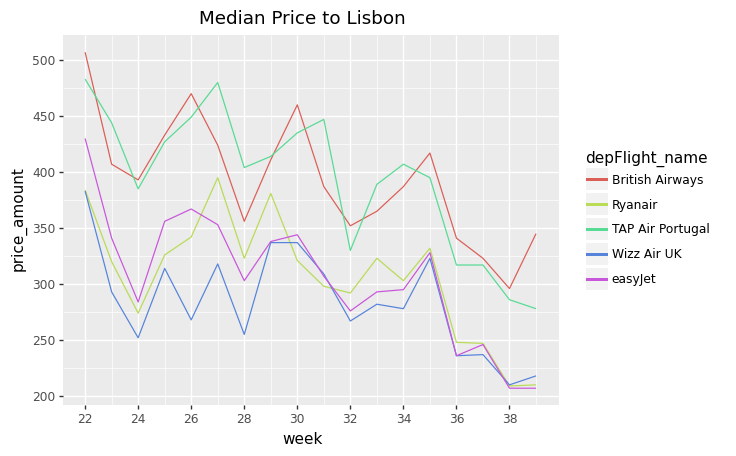

<ggplot: (8788564716668)>

In [1102]:
# MEDIAN PRICE TO LISBON
lisbon_flight_name_week_two_median = selected_cols_price_lisbon.groupby(['depFlight_name', 'week']).median('price_amount').astype(int).reset_index()
display(lisbon_flight_name_week_two_median)


df_long = lisbon_flight_name_week_two_median.melt(id_vars=['depFlight_name', 'week'], var_name='airline', value_name='price_amount')
(ggplot(df_long, aes(x='week', y='price_amount', color='depFlight_name'))
 + geom_line()
 + scale_x_continuous(breaks=range(lisbon_flight_name_week_two_median['week'].min(), lisbon_flight_name_week_two_median['week'].max()+1, 2))
 + scale_y_continuous(breaks=range(0, lisbon_flight_name_week_two_median['price_amount'].max()+1, 50))
+ labs(title="Median Price to Lisbon")
)